# Assignment :- Mini Project

# Title :- 
# Mini Project - Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.). Dataset Link: https://www.kaggle.com/competitions/titanic/data 

# Name :- Shubham Jain

# Class :- BE-1

# Roll no :- 405A036

# Batch :- B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
ports = pd.get_dummies(titanic.Embarked,prefix = 'Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
titanic = titanic.join(ports)

In [11]:
titanic.drop(['Embarked'],axis = 1,inplace = True)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [13]:
titanic.Sex = titanic.Sex.map({'male':0, 'female':1})

In [14]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

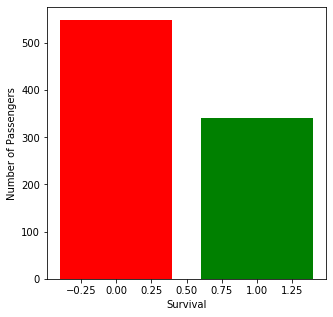

In [15]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic['Survived'].value_counts().keys()),list(titanic['Survived'].value_counts()),color=['r','g'])
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.show()

In [16]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

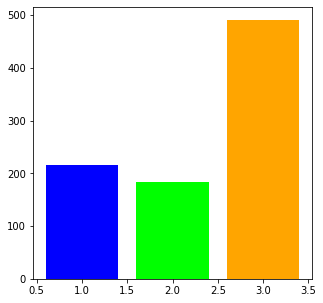

In [17]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic['Pclass'].value_counts().keys()),list(titanic['Pclass'].value_counts()),
        color=['orange','blue','lime'])
plt.show()
#Blue color shows number of passanger in Class-1
#Lime color shows number of passanger in Class-2
#Orange color shows number of passanger in Class-3

In [18]:
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

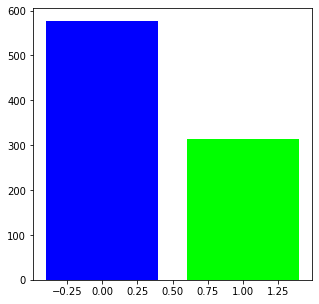

In [19]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic['Sex'].value_counts().keys()),list(titanic['Sex'].value_counts()),color=['blue','lime'])

plt.show()

E:\Anaconda_Python\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda_Python\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


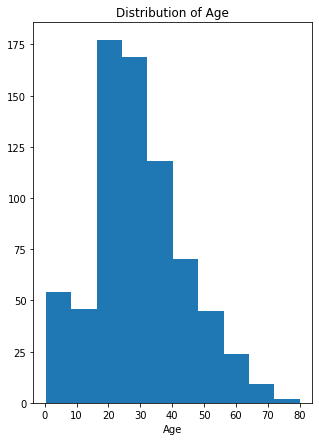

In [20]:
plt.figure(figsize=(5,7))
plt.hist(titanic['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

In [25]:
y = titanic.Survived.copy()
x = titanic.drop(['Survived'],axis=1)

In [26]:
x.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [28]:
x.isnull().values.any()

True

In [29]:
x[pd.isnull(x).any(axis=1)]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,3,0,NaN,0,0,8.4583,0,1,0
17,2,0,NaN,0,0,13.0000,0,0,1
19,3,1,NaN,0,0,7.2250,1,0,0
26,3,0,NaN,0,0,7.2250,1,0,0
28,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...
859,3,0,NaN,0,0,7.2292,1,0,0
863,3,1,NaN,8,2,69.5500,0,0,1
868,3,0,NaN,0,0,9.5000,0,0,1
878,3,0,NaN,0,0,7.8958,0,0,1


In [30]:
x.Age.fillna(x.Age.mean(),inplace = True)

In [31]:
x.isnull().values.any()

False

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
import warnings
warnings.filterwarnings('ignore')
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=model.predict(x_valid)

In [36]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, pred)
accuracy

0.8212290502793296

In [38]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_valid, pred)
cnf_matrix

array([[102,  15],
       [ 17,  45]], dtype=int64)